## Data Preprocessing

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import json
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)

In [2]:
#Import reviews data
reviews = pd.read_csv('Data/yelp_dataset/USres_reviews.csv')

In [3]:
#Import business data
business_data = []
with open('Data/yelp_dataset/business.json') as fin:
    for line in fin:
        line_contents = json.loads(line)
        business_data.append(line_contents)

In [4]:
business_df = pd.DataFrame(business_data)

In [6]:
#Import user data
user = []
with open('Data/yelp_dataset/user.json') as fin:
    for line in fin:
        line_contents = json.loads(line)
        user.append(line_contents)
        
user = pd.DataFrame(user)

In [5]:
business2 = pd.read_csv('Data/yelp_dataset/business3.csv')
business2.shape

(24800, 246)

### Check reviews data

In [5]:
#Check reviews data
print(reviews.shape)
reviews.head()


(2916376, 9)


,useful,business_id,date,user_id,stars,cool,text,review_id,funny
0,0,eU_713ec6fTGNO4BegRaww,2013-01-20 13:25:59,w31MKYsNFMrjhWxxAb5wIw,4.0,0,b'I\'ll be the first to admit that I was not e...,fdiNeiN_hoCxCMy2wTRW9g,0
1,0,8mIrX_LrOnAqWsB5JrOojQ,2011-11-30 02:11:15,FIk4lQQu1eTe2EpzQ4xhBA,4.0,0,"b'Like walking back in time, every Saturday mo...",kbtscdyz6lvrtGjD1quQTg,0
2,0,mRUVMJkUGxrByzMQ2MuOpA,2017-12-15 23:27:08,-mA3-1mN4JIEkqOtdbNXCQ,1.0,0,"b""Walked in around 4 on a Friday afternoon, we...",-I5umRTkhw15RqpKMl_o1Q,1
3,0,NyLYY8q1-H3hfsTwuwLPCg,2015-01-03 22:47:34,86J5DwcFk4f4In1Vxe2TvA,4.0,0,b'Great lunch today. Staff was very helpful in...,1wVA2-vQIuW_ClmXkDxqMQ,0
4,1,cHdJXLlKNWixBXpDwEGb_A,2015-04-01 16:30:00,JSrP-dUmLlwZiI7Dp3PQ2A,3.0,1,b'I love chinese food and I love mexican food....,6BnQwlxRn7ZuWdzninM9sQ,7


In [6]:
# Filter reviews by business2

res_list = business2.business_id.tolist()
reviews2 = reviews.loc[reviews.business_id.isin(res_list)]
reviews2.shape

(2869757, 9)

In [7]:
print ("Number of unique users:", reviews2.user_id.nunique())
print ("Number of unique restaurants:", reviews2.business_id.nunique())


Number of unique users: 903842
Number of unique restaurants: 24800


### Merge business data to reviews

In [5]:
business_df.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,2818 E Camino Acequia Drive,{'GoodForKids': 'False'},1SWheh84yJXfytovILXOAQ,"Golf, Active Life",Phoenix,None,0,33.522143,-112.018481,Arizona Biltmore Golf Club,85016,5,3.0,AZ
1,30 Eglinton Avenue W,"{'RestaurantsReservations': 'True', 'GoodForMe...",QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1,43.605499,-79.652289,Emerald Chinese Restaurant,L5R 3E7,128,2.5,ON
2,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1,35.092564,-80.859132,Musashi Japanese Restaurant,28210,170,4.0,NC
3,"15655 W Roosevelt St, Ste 237",None,xvX2CttrVhyG2z1dFg_0xw,"Insurance, Financial Services",Goodyear,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",1,33.455613,-112.395596,Farmers Insurance - Paul Lorenz,85338,3,5.0,AZ
4,"4209 Stuart Andrew Blvd, Ste F","{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...",HhyxOkGAM07SRYtlQ4wMFQ,"Plumbing, Shopping, Local Services, Home Servi...",Charlotte,"{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...",1,35.190012,-80.887223,Queen City Plumbing,28217,4,4.0,NC


In [8]:
reviews_res = reviews2.merge(business_df[['business_id','name','city','state','categories']], on = 'business_id', how = 'left')
reviews_res.shape

(2869757, 13)

In [9]:
reviews_res.isna().sum()

useful         0
business_id    0
date           0
user_id        0
stars          0
cool           0
text           0
review_id      0
funny          0
name           0
city           0
state          0
categories     0
dtype: int64

In [10]:
#Fix city name
reviews_res['city_lw'] = reviews_res['city'].apply(lambda s: s.lower().rstrip().lstrip())


In [11]:
#Fix 2+ spaces in the city string
import re
pattern = '(?<=[a-z])\s{2,5}(?=[a-z])'
reviews_res['city_lw'] = reviews_res['city_lw'].apply(lambda s: re.sub(pattern, ' ', s))



In [12]:
Count_res_by_city = reviews_res.groupby(['state','city_lw'])['business_id'].nunique().sort_values(ascending = False)
Count_res_by_city

state  city_lw                   
NV     las vegas                     4186
AZ     phoenix                       2701
NC     charlotte                     1954
PA     pittsburgh                    1697
OH     cleveland                     1077
AZ     scottsdale                     917
       mesa                           820
WI     madison                        738
AZ     tempe                          645
NV     henderson                      562
AZ     chandler                       544
       glendale                       494
       gilbert                        402
IL     champaign                      277
AZ     peoria                         266
NV     north las vegas                259
NC     concord                        232
AZ     surprise                       171
NC     gastonia                       152
OH     mentor                         147
       akron                          146
AZ     goodyear                       145
       avondale                       137


In [13]:
Count_reviews_by_city = reviews_res.groupby(['state','city_lw']).size().sort_values(ascending = False)
Count_reviews_by_city

state  city_lw                   
NV     las vegas                     1009625
AZ     phoenix                        364398
       scottsdale                     187230
NC     charlotte                      180960
PA     pittsburgh                     138548
AZ     tempe                           99299
NV     henderson                       95212
AZ     mesa                            78063
       chandler                        72405
OH     cleveland                       71225
WI     madison                         62519
AZ     gilbert                         61480
       glendale                        48693
       peoria                          25953
NV     north las vegas                 21433
IL     champaign                       17386
AZ     surprise                        16918
       goodyear                        15079
       avondale                        12004
OH     lakewood                        11879
NC     concord                          9817
       huntersville  

### Check some extreme users (with large number of reviews)


In [32]:
#Check the user with 1147 reviews
outlier = reviews_count[reviews_count == 1147].index[0]
outlier

'bLbSNkLggFnqwNNzzq-Ijw'

In [33]:
outlier_data = reviews_res.loc[reviews_res.user_id == outlier]
outlier_data.shape

(1147, 13)

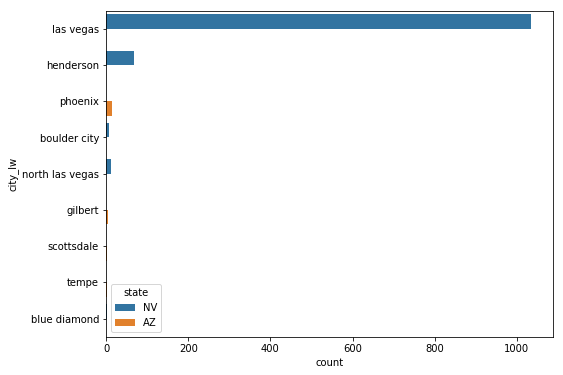

In [34]:
sn.countplot(y = 'city_lw', hue = 'state', data = outlier_data)

In [35]:
outlier_data.groupby(['state','city_lw']).size()


state  city_lw        
AZ     gilbert               5
       phoenix              15
       scottsdale            1
       tempe                 2
NV     blue diamond          1
       boulder city          8
       henderson            67
       las vegas          1035
       north las vegas      13
dtype: int64

In [36]:
outlier_data.stars.describe()

count    1147.000000
mean        3.383609
std         0.709701
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: stars, dtype: float64

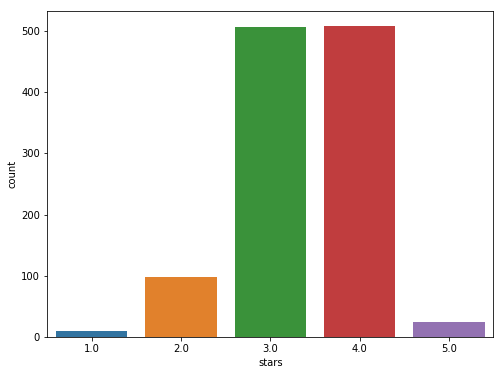

In [37]:
sn.countplot(outlier_data.stars)

## Data Wrangling - all reviews

**reviews_res dataframe**




In [14]:
reviews_res.head()

,useful,business_id,date,user_id,stars,cool,text,review_id,funny,name,city,state,categories,city_lw
0,0,eU_713ec6fTGNO4BegRaww,2013-01-20 13:25:59,w31MKYsNFMrjhWxxAb5wIw,4.0,0,b'I\'ll be the first to admit that I was not e...,fdiNeiN_hoCxCMy2wTRW9g,0,La Tavola Italiana,Pittsburgh,PA,"Restaurants, Italian, Pizza",pittsburgh
1,0,mRUVMJkUGxrByzMQ2MuOpA,2017-12-15 23:27:08,-mA3-1mN4JIEkqOtdbNXCQ,1.0,0,"b""Walked in around 4 on a Friday afternoon, we...",-I5umRTkhw15RqpKMl_o1Q,1,Beast of Bourbon Bar & Grill,Mesa,AZ,"Restaurants, Breakfast & Brunch, Burgers, Amer...",mesa
2,0,NyLYY8q1-H3hfsTwuwLPCg,2015-01-03 22:47:34,86J5DwcFk4f4In1Vxe2TvA,4.0,0,b'Great lunch today. Staff was very helpful in...,1wVA2-vQIuW_ClmXkDxqMQ,0,Choolaah Indian BBQ,Orange Village,OH,"Fast Food, Vegetarian, Restaurants, Vegan, Indian",orange village
3,1,cHdJXLlKNWixBXpDwEGb_A,2015-04-01 16:30:00,JSrP-dUmLlwZiI7Dp3PQ2A,3.0,1,b'I love chinese food and I love mexican food....,6BnQwlxRn7ZuWdzninM9sQ,7,Chino Bandido,Phoenix,AZ,"Caribbean, Szechuan, Mexican, Restaurants, Chi...",phoenix
4,0,6lj2BJ4tJeu7db5asGHQ4w,2017-05-26 01:23:19,6Fz_nus_OG4gar721OKgZA,5.0,0,"b""We've been a huge Slim's fan since they open...",rEITo90tpyKmEfNDp3Ou3A,0,Slim Chickens,Chandler,AZ,"Sandwiches, Restaurants, Southern, Chicken Wings",chandler


In [15]:
print ('Number of users:', reviews_res.user_id.nunique())
print ('Number of restaurants:', reviews_res.business_id.nunique())
print ('Number of reviews:', reviews_res.review_id.nunique())

Number of users: 903842
Number of restaurants: 24800
Number of reviews: 2869757


In [16]:
#Check data distribution
reviews_res.describe()

,useful,stars,cool,funny
count,2.869757e+06,2.869757e+06,2.869757e+06,2.869757e+06
mean,1.060509e+00,3.773498e+00,5.698507e-01,4.428270e-01
std,2.989872e+00,1.388014e+00,2.440303e+00,1.910082e+00
min,-1.000000e+00,1.000000e+00,-1.000000e+00,0.000000e+00
25%,0.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00
75%,1.000000e+00,5.000000e+00,0.000000e+00,0.000000e+00
max,2.440000e+02,5.000000e+00,2.290000e+02,2.170000e+02


In [17]:
#Check -1 for count of useful and cool votes
print(reviews_res.text[1743192])
reviews_res.loc[(reviews_res.useful <0)|(reviews_res.cool <0)]


b"Cornish Pasty saved our Mothers Day! After having to leave a restaurant (where we had made reservations) after waiting 2 hours for our table; we headed off to Cornish Pasty in Mesa. We were seated immediately and waited on quickly and efficiently by Matt. He was so friendly to all of us. Especially my sister (who has special needs). I was so grateful for his cheerfulness; it turned our day around! The food was served quickly and was delicious as well. We have decided that this will be our first choice next Mother's Day!"


,useful,business_id,date,user_id,stars,cool,text,review_id,funny,name,city,state,categories,city_lw
1743192,-1,ohEnmKpF7i2_ujme1p_vUQ,2017-05-15 04:12:55,S7oukZE-NH_33uuWuR47LQ,5.0,-1,"b""Cornish Pasty saved our Mothers Day! After h...",hx5oI9l2xXwZMqyoiMXbeg,0,Cornish Pasty Company,Mesa,AZ,"Restaurants, British",mesa


In [18]:
#There might be a system error for this review. Replace -1 by 0
reviews_res['useful'] = reviews_res['useful'].apply(lambda t: 0 if t ==-1 else t)
reviews_res['cool'] = reviews_res['cool'].apply(lambda t: 0 if t == -1 else t)


In [19]:
#Double check
reviews_res.iloc[1743192]

useful                                                         0
business_id                               ohEnmKpF7i2_ujme1p_vUQ
date                                         2017-05-15 04:12:55
user_id                                   S7oukZE-NH_33uuWuR47LQ
stars                                                          5
cool                                                           0
text           b"Cornish Pasty saved our Mothers Day! After h...
review_id                                 hx5oI9l2xXwZMqyoiMXbeg
funny                                                          0
name                                       Cornish Pasty Company
city                                                        Mesa
state                                                         AZ
categories                                  Restaurants, British
city_lw                                                     mesa
Name: 1743192, dtype: object

In [20]:
#Check Number of reviews by user
reviews_count_by_user = reviews_res.groupby('user_id').size()

In [21]:
print('Number of users with 1 review: ',reviews_count_by_user[reviews_count_by_user==1].shape[0])
print('Number of users with more than 10 reviews and less than 100: ',
      reviews_count_by_user[(reviews_count_by_user>=10) & (reviews_count_by_user <=100)].shape[0])
print ('Number of users with more than 100 reviews:', reviews_count_by_user[reviews_count_by_user >100].shape[0])
print ('Number of users with more than 15 reviews:', reviews_count_by_user[reviews_count_by_user>=15].shape[0])

Number of users with 1 review:  513072
Number of users with more than 10 reviews and less than 100:  47132
Number of users with more than 100 reviews: 1035
Number of users with more than 15 reviews: 26805


In [22]:
reviews_count_by_user.describe()

count    903842.000000
mean          3.175065
std           8.732704
min           1.000000
25%           1.000000
50%           1.000000
75%           3.000000
max        1136.000000
dtype: float64

In [23]:
#Check number of reviews by restaurants
reviews_count_by_res = reviews_res.groupby('business_id').size()

In [24]:
reviews_count_by_res.describe()

count    24800.000000
mean       115.716008
std        248.018584
min          3.000000
25%         14.000000
50%         42.000000
75%        118.000000
max       8570.000000
dtype: float64

In [25]:
print ('Number of restaurants with less than 15 reviews:', 
      reviews_count_by_res[reviews_count_by_res <15].shape[0])
print ('Number of restaurants with less than 20 reviews:', 
      reviews_count_by_res[reviews_count_by_res <20].shape[0])
print ('Number of restaurants with more than 20 reviews:', 
      reviews_count_by_res[reviews_count_by_res >=20].shape[0])

Number of restaurants with less than 15 reviews: 6363
Number of restaurants with less than 20 reviews: 7885
Number of restaurants with more than 20 reviews: 16915


### Prepare matrix of ratings

In [26]:
#Generate doc_id for reviews

list_review_id = reviews_res.review_id.unique().tolist()

#Generate a look up dataframe for review_id
new_review_id = np.arange(len(list_review_id))

review_id_lookup = pd.DataFrame({'review_id': list_review_id,
                                'doc_id': new_review_id})
review_id_lookup.head()




,review_id,doc_id
0,fdiNeiN_hoCxCMy2wTRW9g,0
1,-I5umRTkhw15RqpKMl_o1Q,1
2,1wVA2-vQIuW_ClmXkDxqMQ,2
3,6BnQwlxRn7ZuWdzninM9sQ,3
4,rEITo90tpyKmEfNDp3Ou3A,4


In [27]:
#Add review text to the review_id_lookup dataframe

review_id_lookup = review_id_lookup.merge(reviews_res[['review_id','text']], how = 'left', on = 'review_id')
print (review_id_lookup.shape)
review_id_lookup.head()

(2869757, 3)


,review_id,doc_id,text
0,fdiNeiN_hoCxCMy2wTRW9g,0,b'I\'ll be the first to admit that I was not e...
1,-I5umRTkhw15RqpKMl_o1Q,1,"b""Walked in around 4 on a Friday afternoon, we..."
2,1wVA2-vQIuW_ClmXkDxqMQ,2,b'Great lunch today. Staff was very helpful in...
3,6BnQwlxRn7ZuWdzninM9sQ,3,b'I love chinese food and I love mexican food....
4,rEITo90tpyKmEfNDp3Ou3A,4,"b""We've been a huge Slim's fan since they open..."


In [28]:
# Add doc_id to the review_res and delete the text column
ResReviews_all = reviews_res[['business_id', 'name', 'user_id', 'stars','useful', 'cool','funny','review_id']]

ResReviews_all = ResReviews_all.merge(review_id_lookup[['review_id','doc_id']], how = 'left', on = 'review_id')

#Delete the column review_id
ResReviews_all = ResReviews_all.drop('review_id', axis = 1)

print (ResReviews_all.shape)
ResReviews_all.head()

(2869757, 8)


,business_id,name,user_id,stars,useful,cool,funny,doc_id
0,eU_713ec6fTGNO4BegRaww,La Tavola Italiana,w31MKYsNFMrjhWxxAb5wIw,4.0,0,0,0,0
1,mRUVMJkUGxrByzMQ2MuOpA,Beast of Bourbon Bar & Grill,-mA3-1mN4JIEkqOtdbNXCQ,1.0,0,0,1,1
2,NyLYY8q1-H3hfsTwuwLPCg,Choolaah Indian BBQ,86J5DwcFk4f4In1Vxe2TvA,4.0,0,0,0,2
3,cHdJXLlKNWixBXpDwEGb_A,Chino Bandido,JSrP-dUmLlwZiI7Dp3PQ2A,3.0,1,1,7,3
4,6lj2BJ4tJeu7db5asGHQ4w,Slim Chickens,6Fz_nus_OG4gar721OKgZA,5.0,0,0,0,4


In [29]:
ResReviews_all.describe()

,stars,useful,cool,funny,doc_id
count,2.869757e+06,2.869757e+06,2.869757e+06,2.869757e+06,2.869757e+06
mean,3.773498e+00,1.060509e+00,5.698510e-01,4.428270e-01,1.434878e+06
std,1.388014e+00,2.989872e+00,2.440303e+00,1.910082e+00,8.284276e+05
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.174390e+05
50%,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.434878e+06
75%,5.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.152317e+06
max,5.000000e+00,2.440000e+02,2.290000e+02,2.170000e+02,2.869756e+06


In [30]:
#Check multiple reviews by a user for a business_id
check_multi = ResReviews_all.groupby(['user_id','business_id']).size()
check_multi[check_multi>1]

user_id                 business_id           
---1lKK3aKOuomHnwAkAow  Hqs4YNST_ZHbshwyi4bnsQ    2
--2HUmLkcNHZp0xw6AMBPg  GTuAPBRsM5dVPqPy9oe14Q    2
                        t5Ip9ggWaam6qAUH0WPKVg    2
--4rAAfZnEIAKJE80aIiYg  9RSgLa87uZTZKdTvxy2qyg    2
                        9h2FCxdB5uk4bjX3P47L9g    2
                        VyVIneSU7XAWgMBllI6LnQ    2
--LUapetRSkZpFZ2d-MXLQ  CoyeXg8FBsS_d20QzNIy-A    2
--Nnm_506G_p8MxAOQna5w  3U__XOTBFptjhBeHrPGqrg    3
                        CUivTcULsu5MJIYYNVm1zw    2
                        b5epWgPoVcXoMJdCCzFMUw    3
--RlSfc-QmcHFGHyX6aVjA  j5nPiTwWEFr-VsePew7Sjg    2
--WLHsm-AC4jcol2gOkmCQ  -IWsoxH7mLJTTpU5MmWY4w    2
--ZNfWKj1VyVElRx6-g1fg  UidEFF1WpnU4duev4fjPlQ    2
--_N9jPdYR9WdJKQhekANg  Yl05MqCs9xRzrJFkGWLpgA    2
--inoxVRk5TYjhuI4e304A  KcxNZlw2arK3jCX3-YV9TQ    2
--kbLJ9CG2XjNEsRLh6aqQ  Xp6ogw-SCNK28s1I0fhUXw    2
--xazodgk012WDgg9sOkdg  Nv4CLJ3RLfTQaOfx9umKag    2
-05T0q5BxB9g0RCKiGYoyQ  2NLyAZne2fH5zTHSBin92A    2
-0Hf2jiBo7hJdxYW0

In [31]:
reviews_res.loc[(reviews_res.user_id == 'zza-gQ2jzjAAJkalUHuO6Q') &(reviews_res.business_id == 'baVeDut9bOYwXef7CVgN2w')]

,useful,business_id,date,user_id,stars,cool,text,review_id,funny,name,city,state,categories,city_lw
2674230,0,baVeDut9bOYwXef7CVgN2w,2018-05-12 13:58:43,zza-gQ2jzjAAJkalUHuO6Q,3.0,0,b'What\'s going on with N.H.C!? \nPossibly NEW...,hp_6ZHHrmhKN53B3vdwk5g,0,North Harbor Club,Davidson,NC,"Restaurants, American (New)",davidson
2694580,0,baVeDut9bOYwXef7CVgN2w,2017-05-19 15:24:11,zza-gQ2jzjAAJkalUHuO6Q,5.0,0,b'Thanks to Jason (our server) we had a fantas...,RN1IFZCvolHUUabnwN90xQ,0,North Harbor Club,Davidson,NC,"Restaurants, American (New)",davidson
2755246,0,baVeDut9bOYwXef7CVgN2w,2017-05-21 06:14:24,zza-gQ2jzjAAJkalUHuO6Q,5.0,0,b'Thanks to Jason (our server) we had a fantas...,SUoy55C2BbVtsYCy3IFQcA,0,North Harbor Club,Davidson,NC,"Restaurants, American (New)",davidson


In [32]:
#Create a table with ratings averaged for multiple reviews
rating_tb = ResReviews_all.groupby(['user_id','business_id'], as_index = False)['stars'].mean()

    

In [33]:
rating_tb.stars.describe()

count    2.773504e+06
mean     3.774264e+00
std      1.381802e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: stars, dtype: float64

## Subset data 
Filter data to get users with more than 15 reviews and business with more than 20 reviews

**Method 1: filter by business_id then by user_id**

In [34]:
# Get a list of business_id that has more than 20 reviews
business_id_20 = reviews_count_by_res[reviews_count_by_res >=20]

bus_id_list = business_id_20.index.tolist()
print (len(bus_id_list))

16915


In [35]:
# Subset rating_tb by bus_id_list

rating_tb_sub1 = rating_tb.loc[rating_tb.business_id.isin(bus_id_list)]

# Groupby user_id
rating_user_count = rating_tb_sub1.groupby('user_id').size()

#Get list of user_id with more than 15 reviews
user_id_list = rating_user_count[rating_user_count >=15].index.tolist()

len(user_id_list)

24512

In [36]:
# Get a df with user_id_list
rating_tb_sub2 = rating_tb_sub1.loc[rating_tb_sub1.user_id.isin(user_id_list)]
rating_tb_sub2.shape

(823199, 3)

In [37]:
#Check ratings by user and by restaurants:

check_user1 = rating_tb_sub2.groupby('user_id').size()
check_res1 = rating_tb_sub2.groupby('business_id').size()
print(check_user1.describe())
print(check_res1.describe())


count    24512.000000
mean        33.583510
std         33.286704
min         15.000000
25%         18.000000
50%         23.000000
75%         36.000000
max       1083.000000
dtype: float64
count    16906.000000
mean        48.692713
std         71.066023
min          1.000000
25%         11.000000
50%         24.000000
75%         56.000000
max       1228.000000
dtype: float64


In [38]:
check_res1[check_res1 ==1].shape

(43,)

**Method 2: filter by user_id then by business_id**

In [39]:
#Get a list of users that have at least 15 reviews
user_id_15 = reviews_count_by_user[reviews_count_by_user >=15]

user_id_list2 = user_id_15.index.tolist()
len(user_id_list2)


26805

In [40]:
#Filter rating_tb by user_id_list

rating_tb_sub3 = rating_tb.loc[rating_tb.user_id.isin(user_id_list2)]

In [41]:
# Count number of reviews per restaurant in the rating_tb_sub3

count_review_res = rating_tb_sub3.groupby('business_id').size()

#Get the list of the restaurants that have more than 20 reviews
bus_id_list2  = count_review_res[count_review_res >=20].index.tolist()

len(bus_id_list2)

9851

In [42]:
# Get a df with bus_id_list2
rating_tb_sub4 = rating_tb_sub3.loc[rating_tb_sub3.business_id.isin(bus_id_list2)]

rating_tb_sub4.shape

(776102, 3)

In [43]:
#Check number of ratings by user and by restaurant of rating_tb_sub3

check_user2 = rating_tb_sub4.groupby('user_id').size()
check_res2 = rating_tb_sub4.groupby('business_id').size()
print(check_user2.describe())
print('')
print(check_res2.describe())

count    26804.000000
mean        28.954708
std         29.715005
min          1.000000
25%         15.000000
50%         20.000000
75%         31.000000
max        953.000000
dtype: float64

count    9851.000000
mean       78.784083
std        85.078054
min        20.000000
25%        30.000000
50%        49.000000
75%        93.000000
max      1282.000000
dtype: float64


**Here I decided to use method 1, as the main purpose of the exercise is to recommend restaurants for each user, so we need to have at least 15 reviews per user to have a good recommendation engine.** 

In [129]:
#Save final filtered file to disk

rating_tb_sub2.to_csv('Data/yelp_dataset/data_for_collab.csv', index = False)

### EDA

* Distribution of review count by user
* Average stars by date
* Range of stars by day of the week
* stars vs useful
* stars vs funny
* stars vs cool
* Wordcloud for reviews


#### Word Cloud for review text 
* Pre-process text: stem words; remove punctuations, extra spaces, capitalization, stopwords
* Create Bags of words
* Methods: Frequency of words
* Generate WordCloud 

All Ratings or by each rating (1-5)??

In [44]:
test = reviews_res.text[0]
test

'b\'I\\\'ll be the first to admit that I was not excited about going to La Tavolta. Being a food snob, when a group of friends suggested we go for dinner I looked online at the menu and to me there was nothing special and it seemed overpriced.  Im also not big on ordering pasta when I go out. Alas, I was outnumbered. Thank goodness! I ordered the sea bass special. It was to die for. Cooked perfectly, seasoned perfectly, perfect portion. I can not say enough good things about this dish. When the server asked how it was he seemed very proud of the dish and said, " doesn\\\'t she (the chef) do an incredible job?" She does. \\n\\nMy hubby got the crab tortellini and also loved his. I heard "mmmm this is so good" from all around the table. Our waiter was super nice and even gave us free desserts because we were some of the last people in the restaurant. Service was very slow and the place was PACKED but we had our jugs of wine and a large group with good conversation so it didn\\\'t seem to

In [45]:
#Process text

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
import re

def process_text(text):
    
    stopw = stopwords.words('english')
    stemmer = SnowballStemmer("english")
    
    # Remove non-letters        
    letters_only = re.sub("[^a-zA-Z]", " ", text)
    
    # Tokenize and clean bag of words:
    tokens = word_tokenize(letters_only.lower())
    tokens = [stemmer.stem(t) for t in tokens]
    tokens = [t for t in tokens if t not in stopw]
    tokens = [t for t in tokens if len(t)>1]
    
    return ' '.join(tokens)
    

In [46]:
process_text(test)

'first admit excit go la tavolta food snob group friend suggest go dinner look onlin menu noth special seem overpr im also big order pasta go ala outnumb thank good order sea bass special die cook perfect season perfect perfect portion say enough good thing dish server ask seem veri proud dish said chef incred job doe nmi hubbi got crab tortellini also love heard mmmm good around tabl waiter super nice even gave us free dessert becaus last peopl restaur servic veri slow place pack jug wine larg group good convers seem bother anyon nso ndo order calamari fri zucchini appet leav mussel nif sea bass special high recommend chicken parm crab tortellini also veri good veri big chicken romano bit bland hous salad teeni ndo make reserv still expect wait food go larg group peopl plan loud go date unless fight feel like hear anyth say ask sit side room avail'

In [106]:
#Create a column with clean text
reviews_res['clean_text'] = reviews_res.text.apply(lambda t: process_text(t))

In [109]:
#Save to disk
reviews_res.to_csv('Data/yelp_dataset/USres_reviews_2.csv', index = False)


In [3]:
#Read in clean_text
reviews_res2 = pd.read_csv('Data/yelp_dataset/USres_reviews_2.csv')

In [4]:
reviews_res2.shape

(2869757, 15)

In [5]:
reviews_res2.loc[reviews_res2.clean_text.str.len() <=2]

,useful,business_id,date,user_id,stars,cool,text,review_id,funny,name,city,state,categories,city_lw,clean_text
30996,0,k34J0L6xAnknbv40WGvpcg,2011-12-03 20:51:07,IXSTfBSe56Z0RvYg4Cfn2w,2.0,1,b'ok',WBP5k_cojfOof7HsDwGJfw,0,Pizza Hut,Goodyear,AZ,"Italian, Pizza, Restaurants, Chicken Wings",goodyear,ok
39647,0,Kbbm6Vd5UdbP10dwjBghRw,2011-04-25 07:40:27,vWP8-aQX0rYJszqkWVL7Ew,3.0,0,b'It ok.',FQRidHGdFl5J_pXLXlKq1w,0,In-N-Out Burger,Las Vegas,NV,"Burgers, Fast Food, Restaurants",las vegas,ok
283509,3,1IuHLJ_OX-5bTVBSPJBlEA,2009-05-21 00:24:58,b8vslHjht8t8SmKO0CKC3Q,2.0,1,"b""It's ok""",qoU0iE8oS4VLaBdwiOCUpA,2,Pizza Bogo,Akron,OH,"Restaurants, Food, Pizza",akron,ok
1197777,1,l_GV0hgEoTUf70uJVT0_hg,2015-08-09 19:12:09,WBn3bJsv9nuTMIR6LiYb4Q,5.0,0,b'Go there now. That is all.',eRizdStxCmFPVAjyXczPTg,0,Eat.,Las Vegas,NV,"Breakfast & Brunch, Restaurants, American (New...",las vegas,go
1667390,0,L2iT7pipc455Tgpbo35_mw,2018-10-28 21:51:33,fbdoPtKYg42P2s-XmRCRXA,1.0,0,b'Awful',FXlXTIacN6b88p716KttvA,0,CASA Tempe,Tempe,AZ,"Cocktail Bars, Bars, Tapas Bars, Lounges, Amer...",tempe,aw
2079319,0,HFvcnBSVPk66HUAaVKaK8A,2011-01-17 19:47:52,7g-WlyWttlsPAnwYcWk5uQ,1.0,0,b'Da',Td2PUhHtXMsjz-LINnU8XQ,0,Saffron Patch,Beachwood,OH,"Indian, Vegetarian, Buffets, Restaurants",beachwood,da


In [6]:
#Check number of clean_text has length 0
#reviews_res2.loc[reviews_res2.clean_text.str.len() == 0].shape
reviews_res2.clean_text.isna().sum()

26

In [51]:
#Drop no text reviews
reviews_text = reviews_res2[['stars','clean_text']]
reviews_text.dropna(axis = 0, inplace = True)
print (reviews_text.shape)


(2869731, 2)


/Users/Hailey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [53]:
reviews_text.head()

,stars,clean_text
0,4.0,first admit excit go la tavolta food snob grou...
1,1.0,walk around friday afternoon sat tabl bar walk...
2,4.0,great lunch today staff veri help assist selec...
3,3.0,love chines food love mexican food go wrong co...
4,5.0,huge slim fan sinc open one texa two year ago ...


In [61]:
#Create a dictionary for different ratings and review clean text
reviews_dict = reviews_text.groupby('stars')['clean_text'].apply(list).to_dict()

In [70]:
reviews_dict[1.0][0:2]

['walk around friday afternoon sat tabl bar walk min even think realiz walk howev everyon bar notic walk servic non exist best good way new busi start oh well locat differ thing past sever year ad list smdh',
 'give place star would onli hot pot though im good judg anyth besid shabu must say quantiti small price expens qualiti quantiti tast soup base bland put hot water sauc select limit veri fresh clean perspect love hot pot would never go back becaus home made hot pot much better place without even tri anyway good appetit hot pot favor skip place becaus make miser']

In [69]:
#Check the length of the dictionary
assert (len(reviews_dict[1.0])+len(reviews_dict[2.0])+
        len(reviews_dict[3.0])+len(reviews_dict[4.0])+
    len(reviews_dict[5.0]) == reviews_text.shape[0])


In [85]:
#Create Term Document Matrix (term frequency)
from collections import Counter
def create_TDM(text_list):
    tokens_allreviews = [t for text in text_list for t in text.split(' ') ]
    TDM = Counter(tokens_allreviews)
    return TDM


TDM1 = create_TDM(reviews_dict[1.0])
TDM5 = create_TDM(reviews_dict[5.0])
TDM3 = create_TDM(reviews_dict[3.0])

In [92]:
#Create TDM for wordcloud
TDM1_dict = dict(TDM1.most_common()[:100])
TDM3_dict = dict(TDM3.most_common()[:100])
TDM5_dict = dict(TDM5.most_common()[:100])

In [107]:
#Exclude some common words
words_toExclude = ['food','place']

TDM1_dict2 = {k:v for (k,v) in TDM1_dict.items() if k not in words_toExclude  }
TDM3_dict2 = {k:v for (k,v) in TDM3_dict.items() if k not in words_toExclude  }
TDM5_dict2 = {k:v for (k,v) in TDM5_dict.items() if k not in words_toExclude  }

In [121]:
#Generate wordcloud
from wordcloud import WordCloud

def generate_wc(TDM_dict, rating):
    plt.figure(figsize=(15, 15))
    wc = WordCloud(background_color="white", max_words=1000)
    wc.generate_from_frequencies(TDM_dict)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title('WordCloud for {} rated reviews'.format(str(rating)), fontsize = 30, color = 'darkgreen')
    plt.show()
    


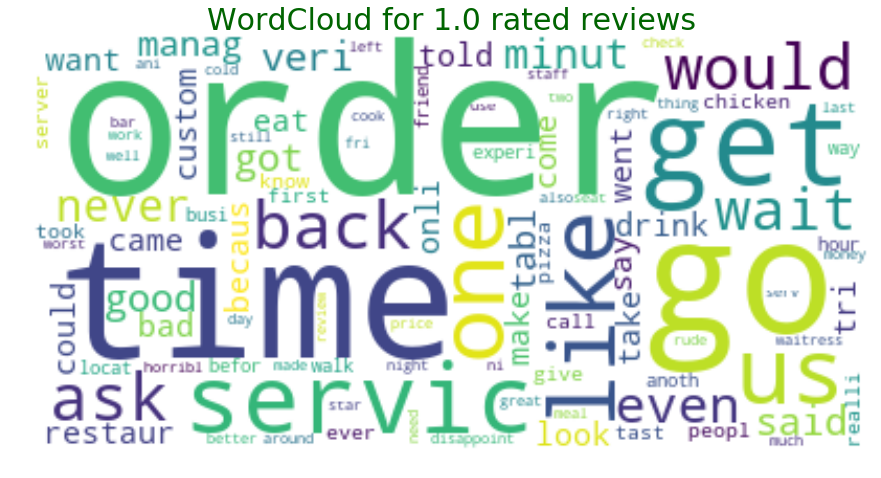

In [122]:
#Wordcloud for 1.0 rating
generate_wc(TDM1_dict2, 1.0)

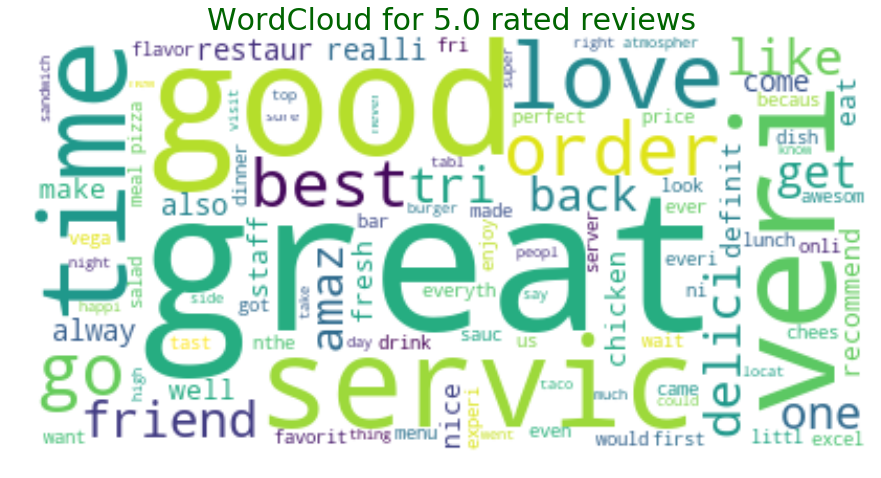

In [123]:
#Wordcloud for 5.0 rating
generate_wc(TDM5_dict2, 5.0)

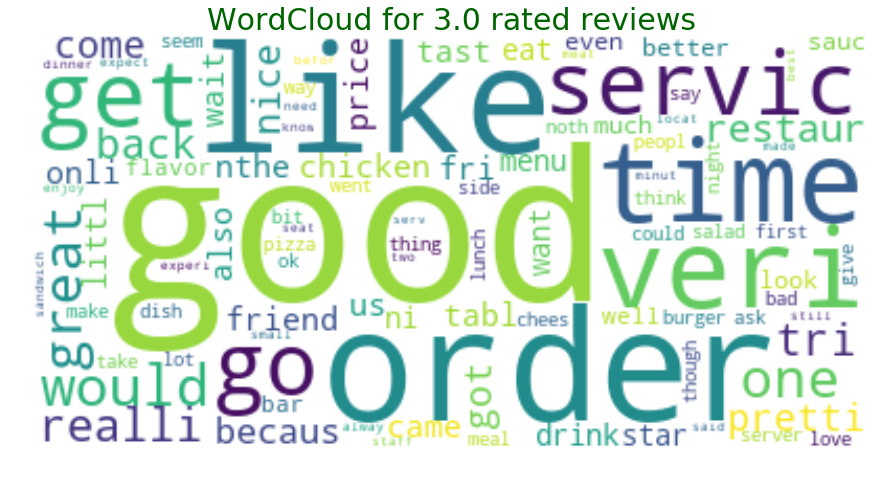

In [124]:
#WordCloud for 3.0 rating
generate_wc(TDM3_dict2, 3.0)

#### Other Visualizations

In [11]:
#Change date to correct datetype
reviews_res2['date'] = pd.to_datetime(reviews_res2['date'], format='%Y-%m-%d %H:%M:%S')

In [55]:
#Get the year
reviews_res2['review_year'] = reviews_res2['date'].apply(lambda d: d.year)
#Get the month
reviews_res2['review_month'] = reviews_res2['date'].apply(lambda d: d.month_name())
# Get the day of the week
reviews_res2['review_dayofweek'] = reviews_res2['date'].apply(lambda d: d.day_name())

In [63]:
#Plot 
def plot_countplot(data, col_name):
    plt.figure(figsize=(12, 6))
    sn.countplot(x = col_name, data = data, palette = "GnBu_d", 
                 order = data[col_name].value_counts(ascending=False).index )
    name = col_name.split('_')[1]
    plt.title('Distribution of reviews in {}'.format(name), fontsize = 20)
    plt.xlabel(name, fontsize = 12)
    plt.show()



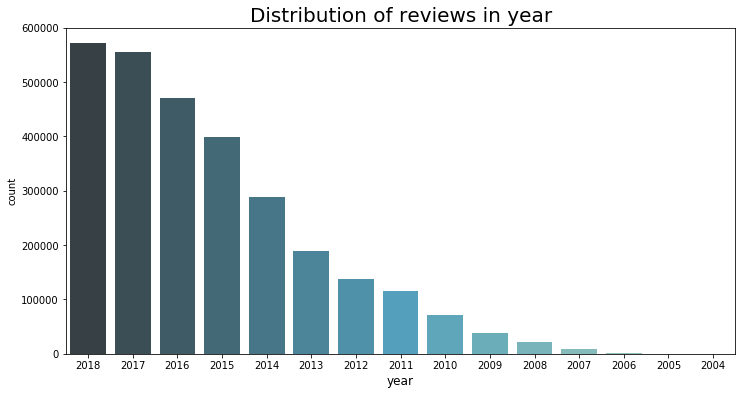

In [64]:
plot_countplot(reviews_res2, 'review_year')

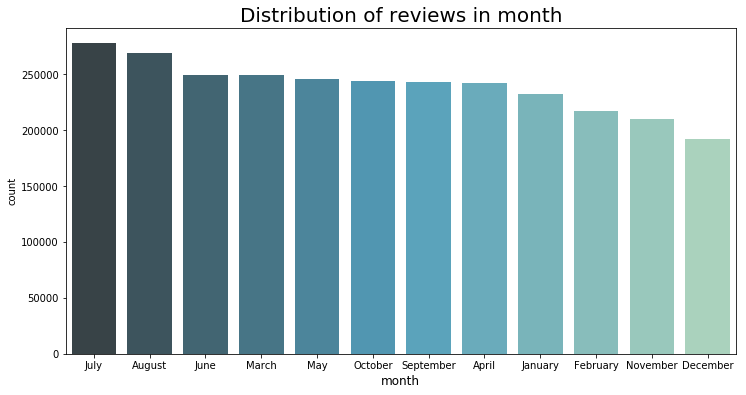

In [65]:
plot_countplot(reviews_res2, 'review_month')

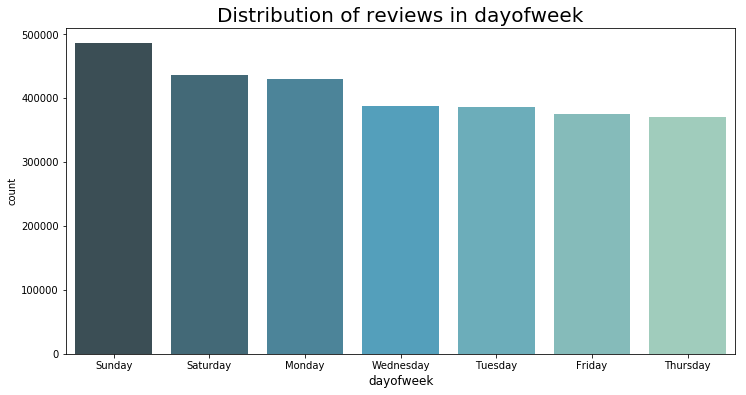

In [66]:
plot_countplot(reviews_res2, 'review_dayofweek')